In [ ]:
# Import necessary libraries
import os
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from PIL import Image
from sklearn.metrics import accuracy_score, confusion_matrix, precision_score, recall_score, f1_score
from keras.datasets import cifar10
from keras.models import Sequential
from keras.layers import Dense, Flatten, Conv2D, MaxPooling2D, BatchNormalization, Dropout
from keras.utils import to_categorical
from keras.callbacks import ModelCheckpoint
from tensorflow import keras
from sklearn import preprocessing


In [ ]:
# Mount Google Drive if you are using Colab
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
# Load CIFAR-10 dataset
(X_train, y_train), (X_test, y_test) = cifar10.load_data()

# Define a dictionary mapping label indices to label names
label_dict = {0: 'airplane', 1: 'automobile', 2: 'bird', 3: 'cat', 4: 'deer',
              5: 'dog', 6: 'frog', 7: 'horse', 8: 'ship', 9: 'truck'}

# Resize images
SIZE = 32
train_images = []
train_labels = []
import cv2
# Capture training data and labels into respective lists
for i in range(len(X_train)):
    img = cv2.resize(X_train[i], (SIZE, SIZE))
    train_images.append(img)
    train_labels.append(y_train[i])

# Convert lists to arrays
train_images = np.array(train_images)
train_labels = np.array(train_labels)

# Capture test/validation data and labels into respective lists
test_images = []
test_labels = []

for i in range(len(X_test)):
    img = cv2.resize(X_test[i], (SIZE, SIZE))
    test_images.append(img)
    test_labels.append(y_test[i])

# Convert lists to arrays
test_images = np.array(test_images)
test_labels = np.array(test_labels)

# Encode labels from text to integers
le = preprocessing.LabelEncoder()
le.fit(test_labels)
test_labels_encoded = le.transform(test_labels)
le.fit(train_labels)
train_labels_encoded = le.transform(train_labels)

/usr/local/lib/python3.10/dist-packages/sklearn/preprocessing/_label.py:99: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.10/dist-packages/sklearn/preprocessing/_label.py:134: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, dtype=self.classes_.dtype, warn=True)
/usr/local/lib/python3.10/dist-packages/sklearn/preprocessing/_label.py:99: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.10/dist-packages/sklearn/preprocessing/_label.py:134: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the 

In [ ]:
# Normalize pixel values to between 0 and 1
train_images = train_images / 255.0
test_images = test_images / 255.0

# One-hot encode y values for neural network
y_train_one_hot = to_categorical(train_labels_encoded)
y_test_one_hot = to_categorical(test_labels_encoded)

In [ ]:
# Define CNN architecture
model = Sequential()
model.add(Conv2D(32, (3, 3), padding='same', activation='relu', input_shape=train_images.shape[1:]))
model.add(BatchNormalization())
model.add(Conv2D(32, (3, 3), padding='same', activation='relu'))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.2))

model.add(Conv2D(64, (3, 3), padding='same', activation='relu'))
model.add(BatchNormalization())
model.add(Conv2D(64, (3, 3), padding='same', activation='relu'))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.3))

model.add(Conv2D(128, (3, 3), padding='same', activation='relu'))
model.add(BatchNormalization())
model.add(Conv2D(128, (3, 3), padding='same', activation='relu'))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.4))

model.add(Flatten())
model.add(Dense(128, activation='relu'))
model.add(BatchNormalization())
model.add(Dropout(0.5))
model.add(Dense(10, activation='softmax'))

# Compile the model
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

# Train the model
history = model.fit(
    train_images, y_train_one_hot,
    batch_size=16,
    epochs=25,
    validation_data=(test_images, y_test_one_hot),
)

Epoch 1/25
3125/3125 [==============================] - 542s 169ms/step - loss: 1.5690 - accuracy: 0.4542 - val_loss: 1.0784 - val_accuracy: 0.6188
Epoch 2/25
3125/3125 [==============================] - 521s 167ms/step - loss: 1.0912 - accuracy: 0.6212 - val_loss: 0.8705 - val_accuracy: 0.6970
Epoch 3/25
3125/3125 [==============================] - 536s 171ms/step - loss: 0.9274 - accuracy: 0.6824 - val_loss: 0.7065 - val_accuracy: 0.7526
Epoch 4/25
3125/3125 [==============================] - 529s 169ms/step - loss: 0.8237 - accuracy: 0.7205 - val_loss: 0.6690 - val_accuracy: 0.7716
Epoch 5/25
3125/3125 [==============================] - 529s 169ms/step - loss: 0.7549 - accuracy: 0.7439 - val_loss: 0.7308 - val_accuracy: 0.7517
Epoch 6/25
3125/3125 [==============================] - 537s 172ms/step - loss: 0.7042 - accuracy: 0.7641 - val_loss: 0.5905 - val_accuracy: 0.7982
Epoch 7/25
3125/3125 [==============================] - 512s 164ms/step - loss: 0.6602 - accuracy: 0.7787 - val_

In [ ]:
# Save the final model
final_model_path = '/content/drive/MyDrive/saved_model'
model.save(final_model_path)

313/313 [==============================] - 28s 90ms/step - loss: 0.4548 - accuracy: 0.8451
Test Loss: 0.45479199290275574
Test Accuracy: 0.8450999855995178
313/313 [==============================] - 25s 78ms/step
Precision: 0.8459096079803532
Recall: 0.8451
F1 Score: 0.8443979851984456


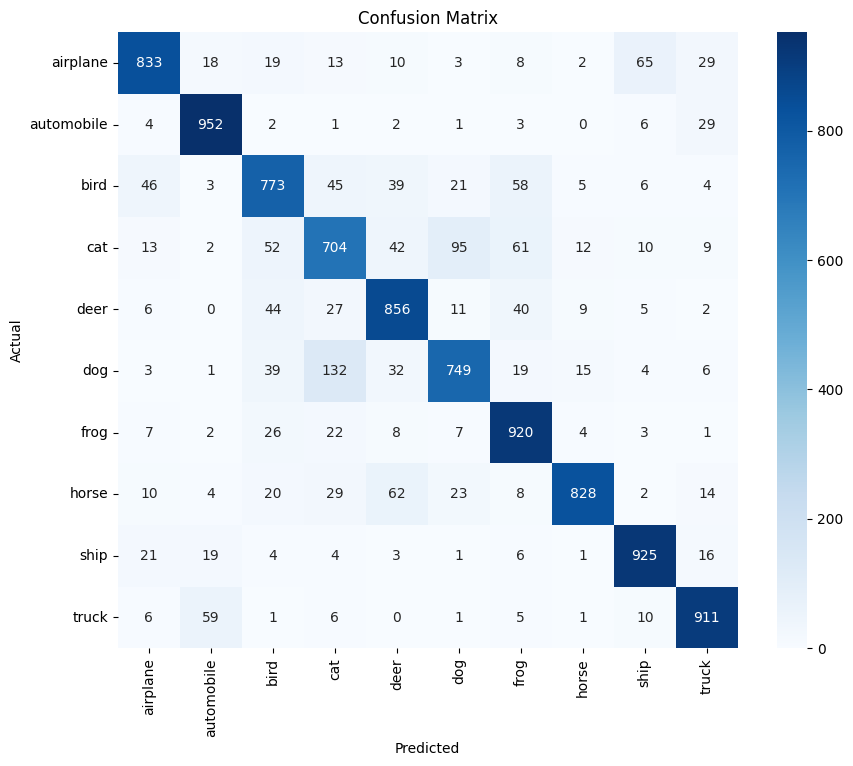

In [ ]:
# Evaluate the model
test_loss, test_acc = model.evaluate(test_images, y_test_one_hot)
print("Test Loss:", test_loss)
print("Test Accuracy:", test_acc)

# Predict on test data
y_pred_one_hot = model.predict(test_images)
y_pred_labels = np.argmax(y_pred_one_hot, axis=1)

# Convert one-hot encoded test labels back to original labels
test_labels_decoded = le.inverse_transform(test_labels_encoded)

# Convert predicted labels back to original labels
y_pred_labels_decoded = le.inverse_transform(y_pred_labels)

# Compute additional evaluation metrics
precision = precision_score(test_labels_decoded, y_pred_labels_decoded, average='weighted')
recall = recall_score(test_labels_decoded, y_pred_labels_decoded, average='weighted')
f1 = f1_score(test_labels_decoded, y_pred_labels_decoded, average='weighted')
print("Precision:", precision)
print("Recall:", recall)
print("F1 Score:", f1)

# Generate confusion matrix
cm = confusion_matrix(test_labels_decoded, y_pred_labels_decoded)
plt.figure(figsize=(10, 8))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=label_dict.values(), yticklabels=label_dict.values())
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

In [ ]:
# Access the accuracy and loss values from the history
accuracy = history.history['accuracy']
val_accuracy = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']

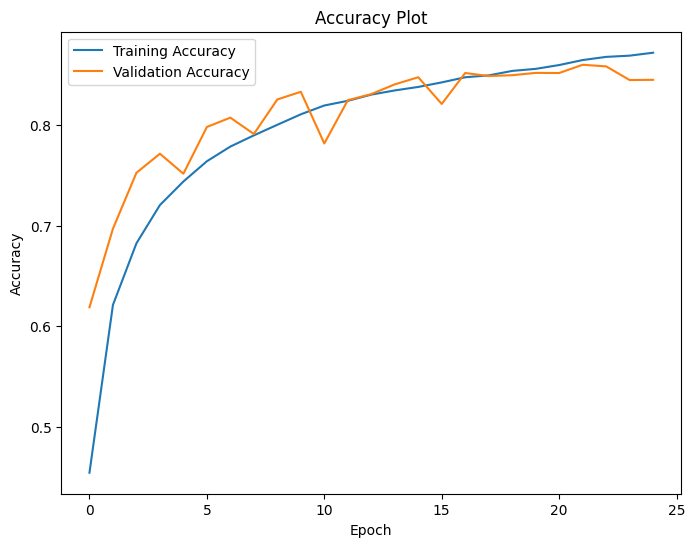

In [ ]:
# Plot accuracy
plt.figure(figsize=(8, 6))
plt.plot(accuracy, label='Training Accuracy')
plt.plot(val_accuracy, label='Validation Accuracy')
plt.title('Accuracy Plot')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

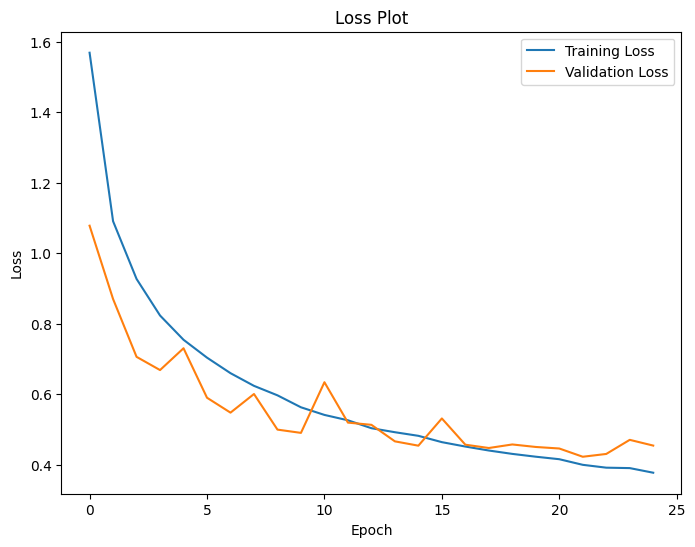

In [ ]:
# Plot loss
plt.figure(figsize=(8, 6))
plt.plot(loss, label='Training Loss')
plt.plot(val_loss, label='Validation Loss')
plt.title('Loss Plot')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.show()

In [ ]:
!pip install gradio


In [ ]:
import numpy as np
import gradio as gr
from PIL import Image
from keras.models import load_model
import cv2

In [ ]:
# Mount Google Drive if you are using Colab
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
# Define paths and constants
final_model_path = '/content/drive/MyDrive/saved_model'
SIZE = 32
label_dict = {0: 'airplane', 1: 'automobile', 2: 'bird', 3: 'cat', 4: 'deer',
              5: 'dog', 6: 'frog', 7: 'horse', 8: 'ship', 9: 'truck'}

# Load the pre-trained model
model = load_model(final_model_path)

# Create a function to preprocess the uploaded image
def preprocess_image(image):
    img = Image.fromarray(image)
    img = img.resize((SIZE, SIZE))
    img = np.array(img) / 255.0
    img = img.reshape((1, SIZE, SIZE, 3))
    return img

# Create a function to predict the label of an uploaded image
def classify_image(image):
    img = preprocess_image(image)
    pred = model.predict(img)
    label_index = np.argmax(pred)
    label = label_dict[label_index]
    return label

# Create a Gradio interface
iface = gr.Interface(
    fn=classify_image,
    inputs="image",
    outputs="text",
    title="CIFAR-10 Image Classifier",
    description="Upload an image and the model will predict its label.",
    allow_flagging=False
)

# Launch the Gradio interface
iface.launch()

/usr/local/lib/python3.10/dist-packages/gradio/interface.py:384: UserWarning: The `allow_flagging` parameter in `Interface` nowtakes a string value ('auto', 'manual', or 'never'), not a boolean. Setting parameter to: 'never'.
  warnings.warn(


Setting queue=True in a Colab notebook requires sharing enabled. Setting `share=True` (you can turn this off by setting `share=False` in `launch()` explicitly).

Colab notebook detected. To show errors in colab notebook, set debug=True in launch()
Running on public URL: https://b78024587b4ca2c04a.gradio.live

This share link expires in 72 hours. For free permanent hosting and GPU upgrades, run `gradio deploy` from Terminal to deploy to Spaces (https://huggingface.co/spaces)
